In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [11]:
dataset_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
data = pd.read_csv(dataset_path)

In [12]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
vocab_size = 10000
maxlen = 200
X = data['review'].values
y = data['sentiment'].values
y = (y == 'positive').astype(int)

In [14]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
250/250 [==============================] - 145s 562ms/step - loss: 0.4029 - accuracy: 0.8096 - val_loss: 0.2920 - val_accuracy: 0.8824
Epoch 2/10
250/250 [==============================] - 141s 563ms/step - loss: 0.2416 - accuracy: 0.9062 - val_loss: 0.3585 - val_accuracy: 0.8591
Epoch 3/10
250/250 [==============================] - 142s 566ms/step - loss: 0.1762 - accuracy: 0.9345 - val_loss: 0.3330 - val_accuracy: 0.8819
Epoch 4/10
250/250 [==============================] - 147s 590ms/step - loss: 0.1396 - accuracy: 0.9507 - val_loss: 0.3597 - val_accuracy: 0.8744
Epoch 5/10
250/250 [==============================] - 143s 572ms/step - loss: 0.1004 - accuracy: 0.9654 - val_loss: 0.3765 - val_accuracy: 0.8764
Epoch 6/10
250/250 [==============================] - 142s 567ms/step - loss: 0.0742 - accuracy: 0.9758 - val_loss: 0.4227 - val_accuracy: 0.8694
Epoch 7/10
250/250 [==============================] - 148s 591ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.4699 -

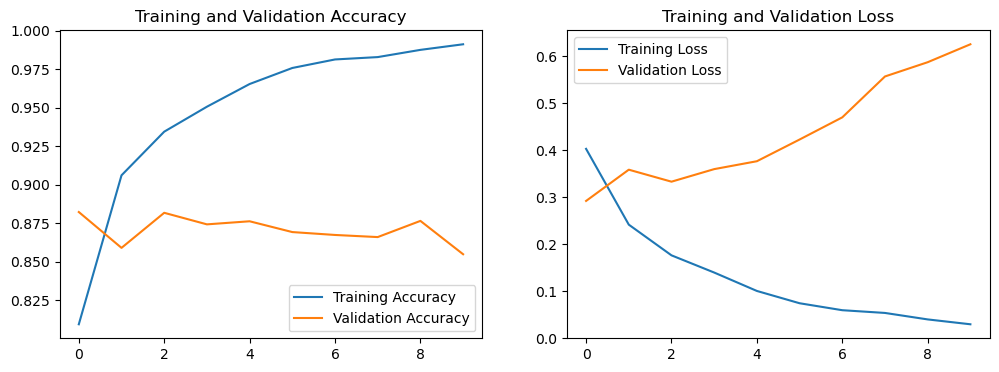

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [20]:
model.save('sentiment_analysis_model.h5')

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/sentiment_analysis_model.h5')
input_text = input("Enter a movie review: ")

word_to_index = tokenizer.word_index
input_sequence = [word_to_index[word] if word in word_to_index else 0 for word in input_text.split()]
input_sequence = pad_sequences([input_sequence], maxlen=200)

prediction = model.predict(input_sequence)[0][0]

if prediction > 0.5:
    sentiment = "positive"
else:
    sentiment = "negative"

print("Predicted Sentiment:", sentiment)
print("Input Text:", input_text)

Enter a movie review:  I don't like that movie


1/1 [==============================] - 1s 894ms/step
Predicted Sentiment: negative
Input Text: I don't like that movie
